In [1]:
import models
import constants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder = './data/'

In [3]:
input_file = pd.read_csv(folder+'input_irradiance_mel.csv', sep=";", decimal=",")

In [4]:
t = np.linspace(0, 1*24*60*60, 48) # in seconds

In [5]:
irr_values = [models.irradiance(time, input_file, 6, 22) for time in t]
irr_df = pd.DataFrame({'time_seconds': t, 'time_hours': t/3600, 'irradiance': irr_values})
irr_df

,time_seconds,time_hours,irradiance
0,0.000000,0.000000,0
1,1838.297872,0.510638,0
2,3676.595745,1.021277,0
3,5514.893617,1.531915,0
4,7353.191489,2.042553,0
5,9191.489362,2.553191,0
6,11029.787234,3.063830,0
7,12868.085106,3.574468,0
8,14706.382979,4.085106,0
9,16544.680851,4.595745,0


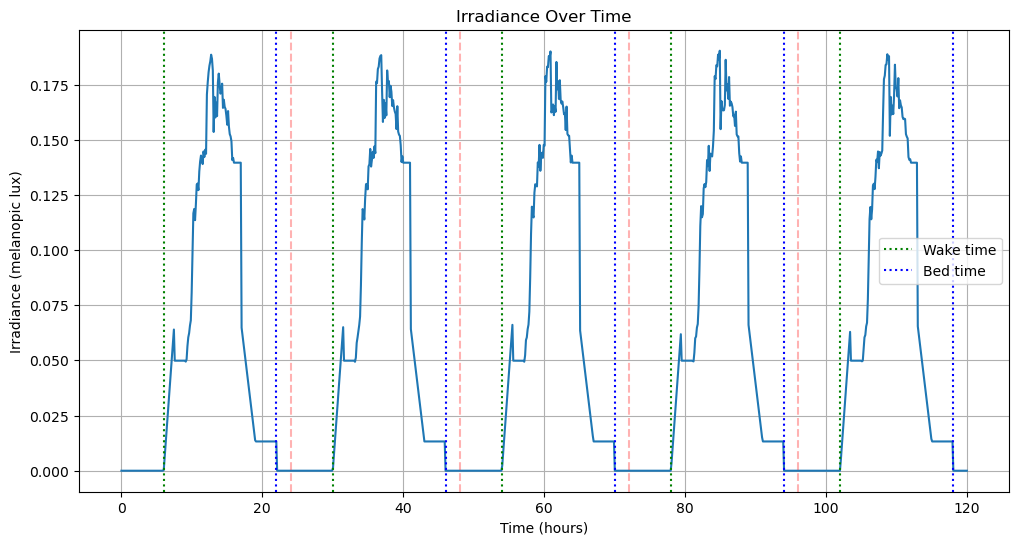

In [11]:
(sol, t) = models.model_run(5, 1000, input_file, 6, 22, 0, 1000, debug=True)

In [15]:
V_v = sol[:, 0]
V_m = sol[:, 1]
H = sol[:, 2]
X = sol[:, 3]
Y = sol[:, 4]
P = sol[:, 5]
Theta_L = sol[:, 6]
A = sol[:,7]
rho_b = sol[:, 8]
t_hours = t/3600

In [16]:
aMT6s = [models.urinary_excretion_rate(rho_b, t, time) for time in t]

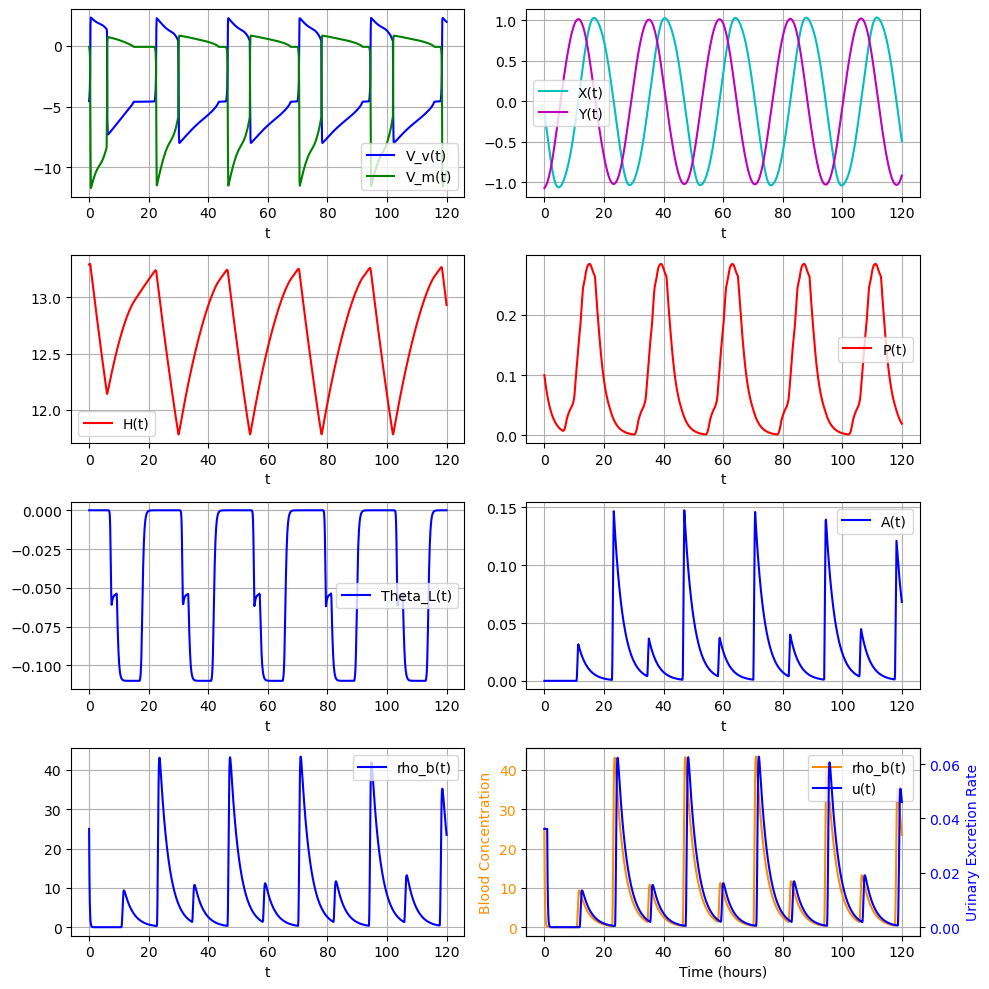

In [20]:
### Plot ODEs
plt.figure(figsize=(10, 10))

plt.subplot(4,2,1)
plt.plot(t_hours, V_v, 'b', label='V_v(t)')
plt.plot(t_hours, V_m, 'g', label='V_m(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(4,2,2)
plt.plot(t_hours, X, 'c', label='X(t)')
plt.plot(t_hours, Y, 'm', label='Y(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(4,2,3)
plt.plot(t_hours, H, 'r', label='H(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(4,2,4)
plt.plot(t_hours, P, 'r', label='P(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(4,2,5)
plt.plot(t_hours, Theta_L, 'b', label='Theta_L(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(4,2,6)
plt.plot(t_hours, A, 'b', label='A(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(4,2,7)
plt.plot(t_hours, rho_b, 'b', label='rho_b(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(4,2,8)
# Primary axis for rho_b
ax1 = plt.gca()
ax1.plot(t_hours, rho_b, label='rho_b(t)', color='darkorange')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Blood Concentration', color='darkorange')
ax1.tick_params(axis='y', labelcolor='darkorange')
ax1.grid(True)

# Secondary axis for aMT6s
ax2 = ax1.twinx()
ax2.plot(t_hours, aMT6s, label='u(t)', color='blue')
ax2.set_ylabel('Urinary Excretion Rate', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Create combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

In [10]:
C = models.circadian_drive_v(X,Y)
AM = models.alertness_measure_v(C, H, Theta_L)

In [ ]:
### Plot AM-related variables
plt.figure(figsize=(5, 10))

plt.subplot(5,1,1)
plt.plot(t_hours, C)
plt.xlabel('t')
plt.ylabel('C(t)')
plt.grid(True)

plt.subplot(5,1,2)
plt.plot(t_hours, H)
plt.xlabel('t')
plt.ylabel('H(t)')
plt.grid(True)

plt.subplot(5,1,3)
plt.plot(t_hours, Theta_L)
plt.xlabel('t')
plt.ylabel('Theta_L(t)')
plt.grid(True)

plt.subplot(5,1,4)
plt.plot(t_hours, AM)
plt.xlabel('t')
plt.ylabel('KSS(t)')
plt.grid(True)